# Alternative Time Series

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv", delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [43]:
df.describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


In [44]:
df.head(5)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


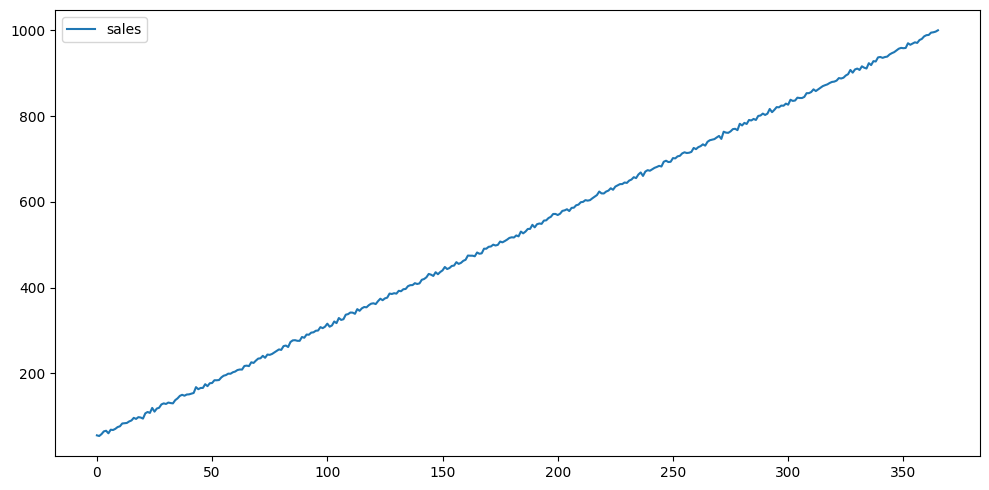

In [45]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data=df)
plt.tight_layout()
plt.show()

The x-axis represents time in months (spanning from 0 to 360), while the y-axis displays sales figures ranging from 0 to 1000.

The graph exhibits an upward trend, meaning a continuous growth in sales since the inception of the company. This positive trajectory is key for predicting future sales over the upcoming months.

In [46]:
decomp = seasonal_decompose(df['sales'], period=12)
decomp

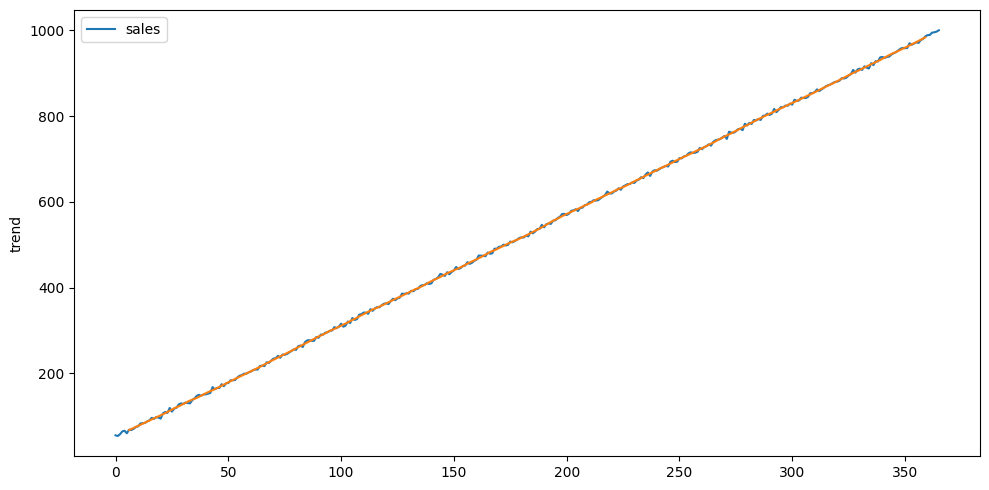

In [47]:
# Trend analysis
trend = decomp.trend

fig, axis = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df)
sns.lineplot(data=trend)

plt.tight_layout()

plt.show()

The trend shown in the graph is a steady and consistent upward trajectory in sales over time. This indicates that sales have been increasing at a nearly constant rate, which suggests sustained growth.

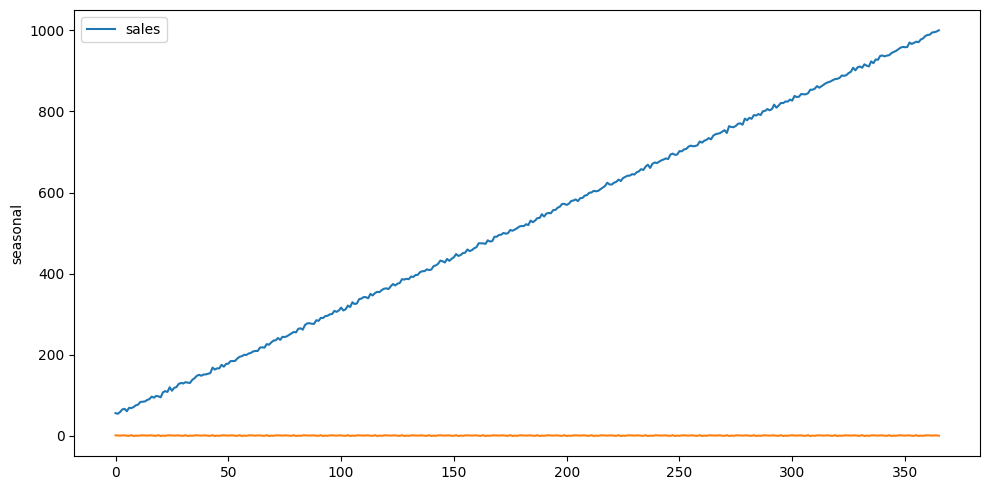

In [48]:
# Analysis of seasonality

seasonal = decomp.seasonal

fig, axis = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df)
sns.lineplot(data = seasonal)

plt.tight_layout()
plt.show()

In [49]:
def test_stationarity(timeseries):
	print("Dickey-Fuller Test:")
	dftest = adfuller(timeseries, autolag = "AIC")
	dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
	for key,value in dftest[4].items():
		dfoutput["Critical Value (%s)"%key] = value
	return dfoutput
	
test_stationarity(df['sales'])

Dickey-Fuller Test:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

The trend shown in the graph is non-stationary, as confirmed by the results of the Dickey-Fuller test. The p-value of 0.986190 exceeds 0.05, so the null hypothesis of non-stationarity cannot be rejected. This implies that the data does not have a constant mean or variance over time. Moreover, there are no discernible seasonal patterns or regular cyclic fluctuations, indicating that the series is dominated by a steadily increasing trend rather than seasonal behavior.

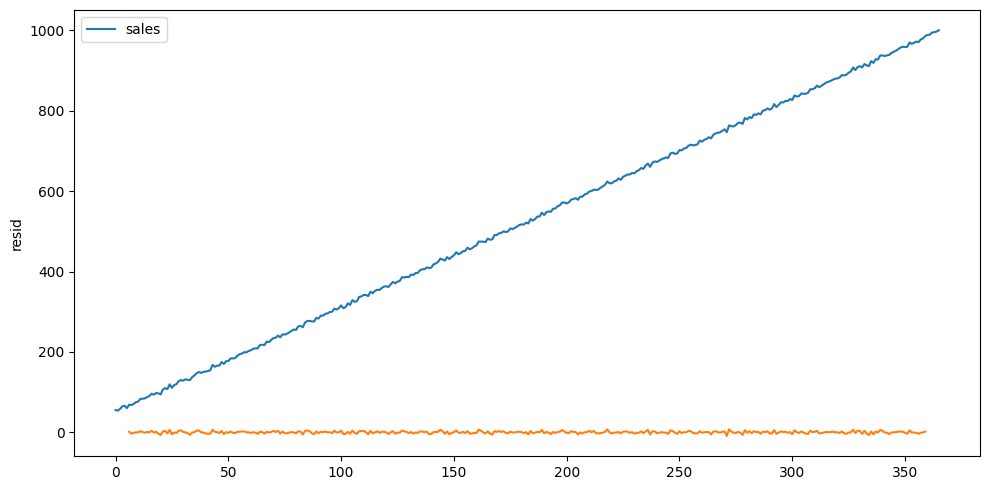

In [50]:
# Variability analysis

residual = decomp.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data=df)
sns.lineplot(data=residual)

plt.tight_layout()
plt.show()

The graph indicates minimal variability or noise in the data. This is evident from the residuals, which remain close to zero throughout the observed range, as shown by the orange line. The lack of significant fluctuations supports a consistent trend with limited random variation, ensuring that the sales data is relatively stable and predictable.

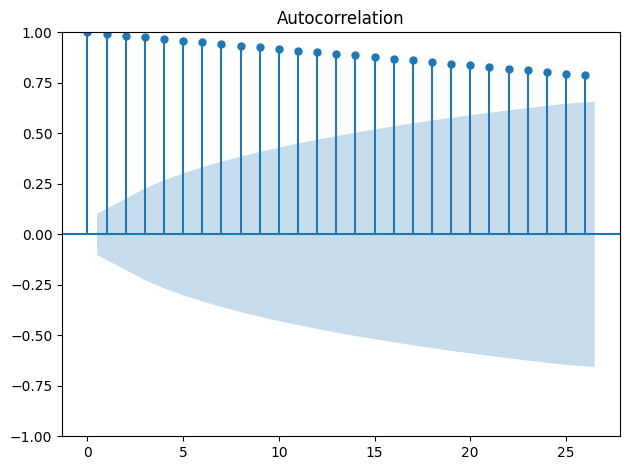

In [51]:
plot_acf(df['sales'])
plt.tight_layout()
plt.show()

The autocorrelation plot indicates a strong correlation at lower lags, as seen by the values within the first few lags being significantly above the confidence interval (shaded blue area). However, at higher lags, the autocorrelation values gradually fall within the confidence interval, suggesting a decline in the influence of past values. This pattern reflects that the time series exhibits some predictable structure, especially in the short term, but also contains random variation or noise as the lag increases.

In [52]:
df_stationary = df['sales'].diff().dropna()
test_stationarity(df_stationary)

Dickey-Fuller Test:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [53]:
from pmdarima import auto_arima

arima_model = auto_arima(df_stationary, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.106, Time=1.48 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.15 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=0.70 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.049, Time=0.38 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=0.96 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.15 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.30 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.436, Time=1.10 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=0.73 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.18 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1841.456, Time=0.53 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1841.455, Time=0.35 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=1843.455, Time=0.69 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1839.587, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1970.972, Time=0.04 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=1839.608, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1922.649, Time=0.05 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[12]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,0,1)(0,0,0)[12] intercept
Total fit time: 9.890 seconds


In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(len(df) * 0.8)
train, test = df['sales'][:train_size], df['sales'][train_size:]
model = SARIMAX(train, order=(1,0,1), seasonal_order=(0,0,0,12), enforce_stationarity=False, enforce_invertibility=False)

result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -818.070
Date:                Wed, 07 May 2025   AIC                           1642.140
Time:                        18:13:05   BIC                           1653.149
Sample:                             0   HQIC                          1646.551
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0048      0.000   3123.420      0.000       1.004       1.005
ma.L1         -0.3662      0.055     -6.625      0.000      -0.475      -0.258
sigma2        16.0771      1.297     12.398      0.0

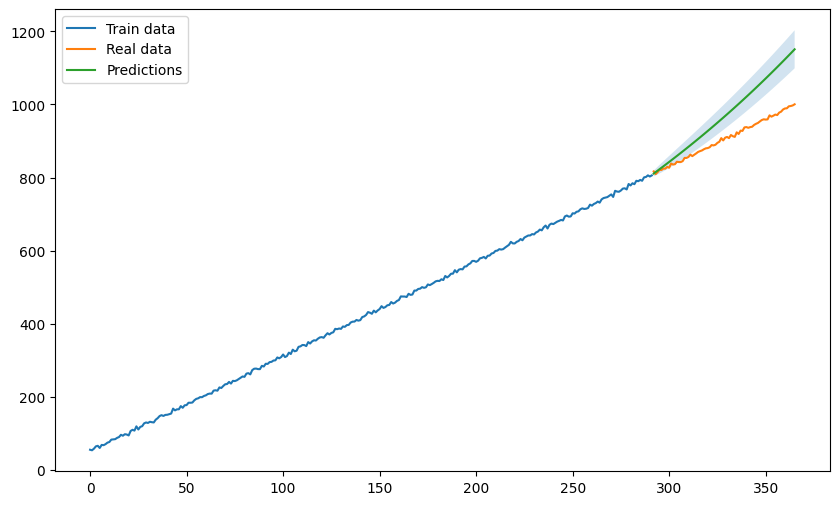

In [55]:
predictions = result.get_forecast(steps=len(test))
pred_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train data')
plt.plot(test, label='Real data')
plt.plot(test.index, pred_mean, label='Predictions')
plt.fill_between(test.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 alpha=0.2)
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, pred_mean))
print(f"RMSE: {rmse}")

RMSE: 79.92104469961204


In [57]:
from joblib import dump

dump(model, "../models/sarimax_model.sav")

['../models/sarimax_model.sav']